In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sizes = pd.read_csv("/home/icb/vnicolas.goedert/workspace/RNARepLearn/rfam/data/raw/processed/release-14.8/all_sizes", delim_whitespace=True, header= None)
sizes.columns=["RFAM","sample","size"]

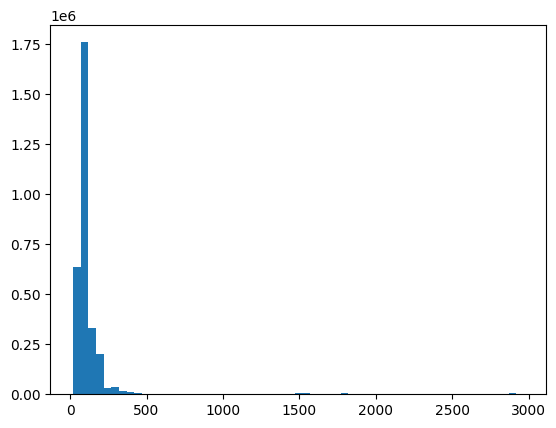

In [8]:
plt.hist(sizes["size"], bins=range(min(sizes["size"]), 3000, 50))
plt.show()

In [13]:
len(sizes["size"])

3107422

In [15]:
sizes

,RFAM,sample,size
0,RF03874,CM000012.3/40720025-40720129,105
1,RF03874,CM000039.3/48070580-48070476,105
2,RF03874,CM000039.3/97891177-97891281,105
3,RF03874,CM000015.3/30958770-30958874,105
4,RF03874,CM000001.3/62682320-62682424,105
...,...,...,...
3107417,RF02335,CH991768.1/104127-104022,106
3107418,RF02335,AHHH01000007.1/11193-11088,106
3107419,RF02335,AY820283.1/1-104,104
3107420,RF02335,L27110.1/23-125,103


In [16]:
sizes["path"]=sizes["RFAM"]+"/"+sizes["sample"]

In [18]:
sizes_u300 = sizes[sizes["size"]<300]

In [19]:
sizes_u300

,RFAM,sample,size,path
0,RF03874,CM000012.3/40720025-40720129,105,RF03874/CM000012.3/40720025-40720129
1,RF03874,CM000039.3/48070580-48070476,105,RF03874/CM000039.3/48070580-48070476
2,RF03874,CM000039.3/97891177-97891281,105,RF03874/CM000039.3/97891177-97891281
3,RF03874,CM000015.3/30958770-30958874,105,RF03874/CM000015.3/30958770-30958874
4,RF03874,CM000001.3/62682320-62682424,105,RF03874/CM000001.3/62682320-62682424
...,...,...,...,...
3107417,RF02335,CH991768.1/104127-104022,106,RF02335/CH991768.1/104127-104022
3107418,RF02335,AHHH01000007.1/11193-11088,106,RF02335/AHHH01000007.1/11193-11088
3107419,RF02335,AY820283.1/1-104,104,RF02335/AY820283.1/1-104
3107420,RF02335,L27110.1/23-125,103,RF02335/L27110.1/23-125


In [21]:
sizes_u300["path"].to_csv("/lustre/groups/crna01/workspace/nicolas_msc/RNARepLearn/rfam/data/raw/processed/release-14.8/under300/files.list", index=False)

In [22]:
from RNARepLearn.datasets import CombinedRfamDataset

/home/icb/vnicolas.goedert/miniconda3/envs/RNARepLearn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
ds = CombinedRfamDataset("/lustre/groups/crna01/workspace/nicolas_msc/RNARepLearn/rfam/data/raw/processed/release-14.8/",None, "under300")

Processing...


Processing complete


Done!


In [27]:
import numpy as np

In [44]:
while True:
    x = np.load("/home/icb/vnicolas.goedert/workspace/RNARepLearn/rfam/data/raw/processed/release-14.8/RF00005/RF00005.npy", allow_pickle=True).item()
    if x['id'] == "LSSL01001697.1/7778-7849":
        print(x)
        break

KeyboardInterrupt: 

In [47]:
len(sizes[sizes["RFAM"]=="RF00005"])

1430083